### Projeto: Análise da área de Dados


#### Contexto

- Fonte dos dados: https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-20242025
- Os dados são fornecem um panorma sobre o mercado de trabalho brasileiro na área de Dados.

### Objetivos da Análise

Entender quais são os fatores relacionados à remuneração dos profissionais de dados.

#### Sobre os dados da Pesquisa
O questionário foi dividido em 8 partes, e dentro de cada uma das partes temos as perguntas e opções de escolha.

- Parte 1 - Dados demográficos
- Parte 2 - Dados sobre carreira
- Parte 3 - Desafios dos gestores de times de dados
- Parte 4 - Conhecimentos na área de dados
- Parte 5 - Objetivos na área de dados
- Parte 6 - Conhecimentos em Engenharia de Dados/DE
- Parte 7 - Conhecimentos em Análise de Dados/DA
- Parte 8 - Conhecimentos em Ciências de Dados/DS

Cada pergunta é dividida em Parte, Letra da Pergunta, Número da Opção escolhida
Exemplo: P3a_1 = Parte 3, pergunta (a), opção (1)

In [1]:
import pandas as pd
import re as re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette='Set2', context='notebook')

from src.config import DADOS_ORIGINAIS
from src.graficos import composicao_histograma_boxplot

In [2]:
base = pd.read_csv(DADOS_ORIGINAIS)

base.head(5)

,0.a_token,0.d_data/hora_envio,1.a_idade,1.a.1_faixa_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.e_experiencia_profissional_prejudicada,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia",...,"8.d.3_Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",8.d.4_Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"8.d.5_Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","8.d.6_Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","8.d.7_Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","8.d.8_Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","8.d.9_Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",8.d.10_Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"8.d.11_Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)",8.d.12_Treinando e aplicando LLM's para solucionar problemas de negócio.
0,reb94rv0msth7q4nreb94riaq80iz3yi,16/10/2024 11:19:17,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1zc66g69jjt49y32l1zc66g8wqj79m4e,16/10/2024 20:45:31,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,uu99wmam4n5kc2uu99wmydf0rk7l58f7,17/10/2024 18:10:59,18,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3ynsw7z0hl5hhpbfvaeqk73ynsw7z04l,22/10/2024 18:03:00,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,v6bji2ct5xckpl1uouv6bjiotkrf3b4f,23/10/2024 01:33:23,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Columns: 403 entries, 0.a_token to 8.d.12_Treinando e aplicando LLM's para solucionar problemas de negócio.
dtypes: bool(1), float64(323), int64(1), object(78)
memory usage: 16.0+ MB


In [5]:
base.describe()

,1.a_idade,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia","1.e.3_Sim, devido a minha identidade de gênero","1.e.4_Sim, devido ao fato de ser PCD",1.f.1_Quantidade de oportunidades de emprego/vagas recebidas,1.f.2_Senioridade das vagas recebidas em relação à sua experiência,1.f.3_Aprovação em processos seletivos/entrevistas,1.f.4_Oportunidades de progressão de carreira,1.f.5_Velocidade de progressão de carreira,...,"8.d.3_Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",8.d.4_Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"8.d.5_Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","8.d.6_Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","8.d.7_Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","8.d.8_Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","8.d.9_Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",8.d.10_Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"8.d.11_Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)",8.d.12_Treinando e aplicando LLM's para solucionar problemas de negócio.
count,5217.000000,2641.000000,2641.000000,2641.000000,2641.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,...,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,32.358827,0.511927,0.221128,0.319576,0.033321,0.392552,0.359969,0.373157,0.521334,0.556245,...,0.222510,0.298836,0.086675,0.091850,0.041397,0.003881,0.043984,0.009056,0.011643,0.133247
std,7.419433,0.499952,0.415085,0.466401,0.179507,0.488508,0.480177,0.483831,0.499739,0.497019,...,0.416201,0.458044,0.281541,0.289001,0.199336,0.062217,0.205193,0.094791,0.107342,0.340062
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
colunas_lista = base.columns.to_list()
colunas_lista

['0.a_token',
 '0.d_data/hora_envio',
 '1.a_idade',
 '1.a.1_faixa_idade',
 '1.b_genero',
 '1.c_cor/raca/etnia',
 '1.d_pcd',
 '1.e_experiencia_profissional_prejudicada',
 '1.e.1_Não acredito que minha experiência profissional seja afetada',
 '1.e.2_Sim, devido a minha Cor/Raça/Etnia',
 '1.e.3_Sim, devido a minha identidade de gênero',
 '1.e.4_Sim, devido ao fato de ser PCD',
 '1.i.1_uf_onde_mora',
 '1.f.1_Quantidade de oportunidades de emprego/vagas recebidas',
 '1.f.2_Senioridade das vagas recebidas em relação à sua experiência',
 '1.f.3_Aprovação em processos seletivos/entrevistas',
 '1.f.4_Oportunidades de progressão de carreira',
 '1.f.5_Velocidade de progressão de carreira',
 '1.f.6_Nível de cobrança no trabalho/Stress no trabalho',
 '1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias',
 '1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho',
 '1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho

Devido a grande quantidade de colunas (324) iremos selecionar alguma colunas hipotéticamente que podem afetar a faixa de salários para analisá-las.

In [59]:
coluna_alvo = '2.h_faixa_salarial'

colunas_lista
'1.a_idade',
'1.b_genero',
'1.i.1_uf_onde_mora',
 '1.g_vive_no_brasil',
 '1.i.1_uf_onde_mora',
'1.l_nivel_de_ensino',
 '1.m_área_de_formação',
 '2.a_situação_de_trabalho',
 '2.d_atua_como_gestor',
'2.f_cargo_atual',
'2.g_nivel',
'2.i_tempo_de_experiencia_em_dados',
 '2.j_tempo_de_experiencia_em_ti',
 '2.r_modelo_de_trabalho_atual',


['0.a_token',
 '0.d_data/hora_envio',
 '1.a_idade',
 '1.a.1_faixa_idade',
 '1.b_genero',
 '1.c_cor/raca/etnia',
 '1.d_pcd',
 '1.e_experiencia_profissional_prejudicada',
 '1.e.1_Não acredito que minha experiência profissional seja afetada',
 '1.e.2_Sim, devido a minha Cor/Raça/Etnia',
 '1.e.3_Sim, devido a minha identidade de gênero',
 '1.e.4_Sim, devido ao fato de ser PCD',
 '1.i.1_uf_onde_mora',
 '1.f.1_Quantidade de oportunidades de emprego/vagas recebidas',
 '1.f.2_Senioridade das vagas recebidas em relação à sua experiência',
 '1.f.3_Aprovação em processos seletivos/entrevistas',
 '1.f.4_Oportunidades de progressão de carreira',
 '1.f.5_Velocidade de progressão de carreira',
 '1.f.6_Nível de cobrança no trabalho/Stress no trabalho',
 '1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias',
 '1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho',
 '1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho

In [7]:
base = base.drop(['0.a_token','0.d_data/hora_envio'],axis=1)
base.head()

,1.a_idade,1.a.1_faixa_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.e_experiencia_profissional_prejudicada,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia","1.e.3_Sim, devido a minha identidade de gênero","1.e.4_Sim, devido ao fato de ser PCD",...,"8.d.3_Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",8.d.4_Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"8.d.5_Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","8.d.6_Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","8.d.7_Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","8.d.8_Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","8.d.9_Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",8.d.10_Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"8.d.11_Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)",8.d.12_Treinando e aplicando LLM's para solucionar problemas de negócio.
0,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Parte 1 - Dados demográficos

In [8]:
parte1 = [
 '1.a_idade',
 '1.a.1_faixa_idade',
 '1.b_genero',
 '1.c_cor/raca/etnia',
 '1.d_pcd',
 '1.e_experiencia_profissional_prejudicada',
 '1.e.1_Não acredito que minha experiência profissional seja afetada',
 '1.e.2_Sim, devido a minha Cor/Raça/Etnia',
 '1.e.3_Sim, devido a minha identidade de gênero',
 '1.e.4_Sim, devido ao fato de ser PCD',
 '1.i.1_uf_onde_mora',
 '1.f.1_Quantidade de oportunidades de emprego/vagas recebidas',
 '1.f.2_Senioridade das vagas recebidas em relação à sua experiência',
 '1.f.3_Aprovação em processos seletivos/entrevistas',
 '1.f.4_Oportunidades de progressão de carreira',
 '1.f.5_Velocidade de progressão de carreira',
 '1.f.6_Nível de cobrança no trabalho/Stress no trabalho',
 '1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias',
 '1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho',
 '1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho',
 '1.i.2_regiao_onde_mora',
 '1.f_aspectos_prejudicados',
 '1.k.1_uf_de_origem',
 '1.k.2_regiao_de_origem',
 '1.g_vive_no_brasil',
 '1.h_pais_onde_mora',
 '1.i_estado_onde_mora',
 '1.j_vive_no_estado_de_formacao',
 '1.k_estado_de_origem',
 '1.l_nivel_de_ensino',
 '1.m_área_de_formação'
]

In [9]:
base[parte1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 31 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   1.a_idade                                                                                                  5217 non-null   int64  
 1   1.a.1_faixa_idade                                                                                          5217 non-null   object 
 2   1.b_genero                                                                                                 5217 non-null   object 
 3   1.c_cor/raca/etnia                                                                                         5217 non-null   object 
 4   1.d_pcd                                                                 

In [10]:
base[parte1].describe()

,1.a_idade,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia","1.e.3_Sim, devido a minha identidade de gênero","1.e.4_Sim, devido ao fato de ser PCD",1.f.1_Quantidade de oportunidades de emprego/vagas recebidas,1.f.2_Senioridade das vagas recebidas em relação à sua experiência,1.f.3_Aprovação em processos seletivos/entrevistas,1.f.4_Oportunidades de progressão de carreira,1.f.5_Velocidade de progressão de carreira,1.f.6_Nível de cobrança no trabalho/Stress no trabalho,1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias,"1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho","1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho"
count,5217.000000,2641.000000,2641.000000,2641.000000,2641.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000
mean,32.358827,0.511927,0.221128,0.319576,0.033321,0.392552,0.359969,0.373157,0.521334,0.556245,0.276959,0.556245,0.293251,0.247479
std,7.419433,0.499952,0.415085,0.466401,0.179507,0.488508,0.480177,0.483831,0.499739,0.497019,0.447670,0.497019,0.455429,0.431715
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,36.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
base[parte1].nunique()

1.a_idade                                                                                                     49
1.a.1_faixa_idade                                                                                              9
1.b_genero                                                                                                     4
1.c_cor/raca/etnia                                                                                             7
1.d_pcd                                                                                                        3
1.e_experiencia_profissional_prejudicada                                                                      20
1.e.1_Não acredito que minha experiência profissional seja afetada                                             2
1.e.2_Sim, devido a minha Cor/Raça/Etnia                                                                       2
1.e.3_Sim, devido a minha identidade de gênero                                                  

In [12]:
colunas_binarias = base.nunique()[base.nunique() == 2].index.tolist()

colunas_binarias

['1.e.1_Não acredito que minha experiência profissional seja afetada',
 '1.e.2_Sim, devido a minha Cor/Raça/Etnia',
 '1.e.3_Sim, devido a minha identidade de gênero',
 '1.e.4_Sim, devido ao fato de ser PCD',
 '1.f.1_Quantidade de oportunidades de emprego/vagas recebidas',
 '1.f.2_Senioridade das vagas recebidas em relação à sua experiência',
 '1.f.3_Aprovação em processos seletivos/entrevistas',
 '1.f.4_Oportunidades de progressão de carreira',
 '1.f.5_Velocidade de progressão de carreira',
 '1.f.6_Nível de cobrança no trabalho/Stress no trabalho',
 '1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias',
 '1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho',
 '1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho',
 '1.g_vive_no_brasil',
 '1.j_vive_no_estado_de_formacao',
 '2.d_atua_como_gestor',
 '2.k_satisfeito_atualmente',
 '2.l.1_Remuneração/Salário',
 '2.l.2_Benefícios',
 '2.l.3_Propósito do trab

Essas colunas binárias são todas categóricas de "Sim" ou "Não", onde 1=Sim e 0=Não

In [13]:
for coluna in colunas_binarias:
    base[coluna] = pd.Categorical(base[coluna]).rename_categories(["Não","Sim"])

Essas colunas foram formatados para o tipo categórico e renomeados para "Sim" ou "Não"

Verificar distribuição de idade dos participantes

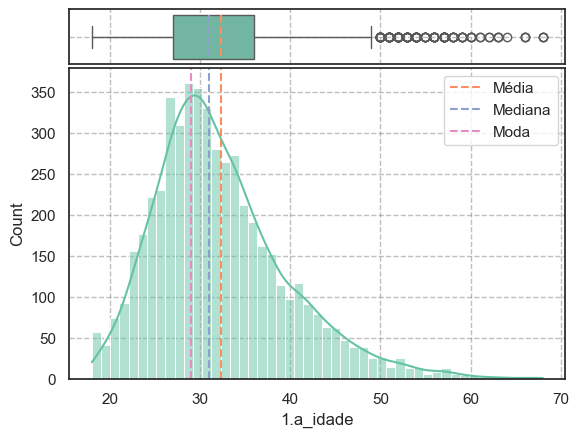

In [14]:
composicao_histograma_boxplot(base, '1.a_idade' , intervalos="auto")

In [15]:
base['1.a_idade'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5217 entries, 0 to 5216
Series name: 1.a_idade
Non-Null Count  Dtype
--------------  -----
5217 non-null   int64
dtypes: int64(1)
memory usage: 40.9 KB


<Axes: xlabel='1.a.1_faixa_idade', ylabel='Count'>

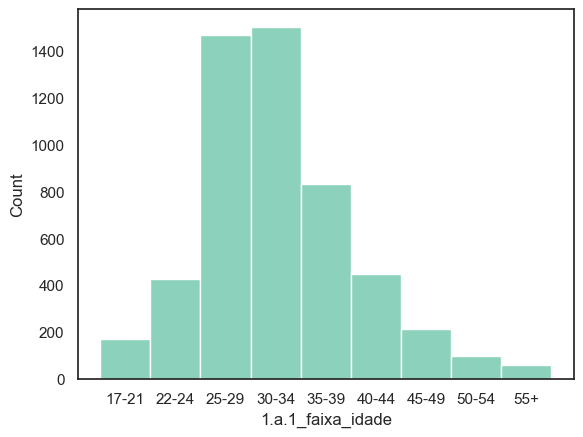

In [16]:
sns.histplot(data=base, x='1.a.1_faixa_idade')

<Axes: xlabel='Count', ylabel='1.b_genero'>

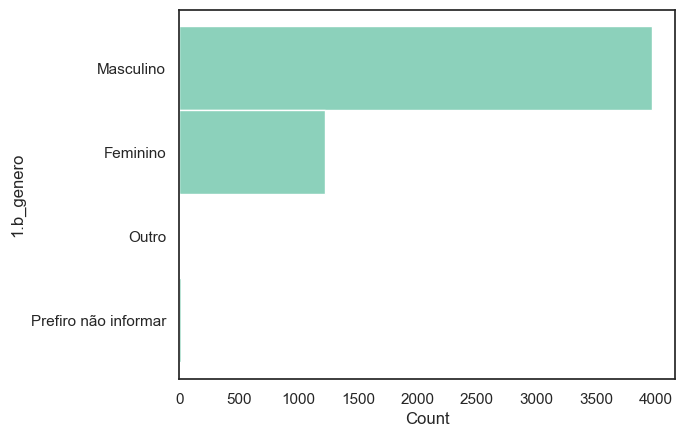

In [17]:
sns.histplot(data=base, y='1.b_genero')

<Axes: xlabel='Count', ylabel='1.c_cor/raca/etnia'>

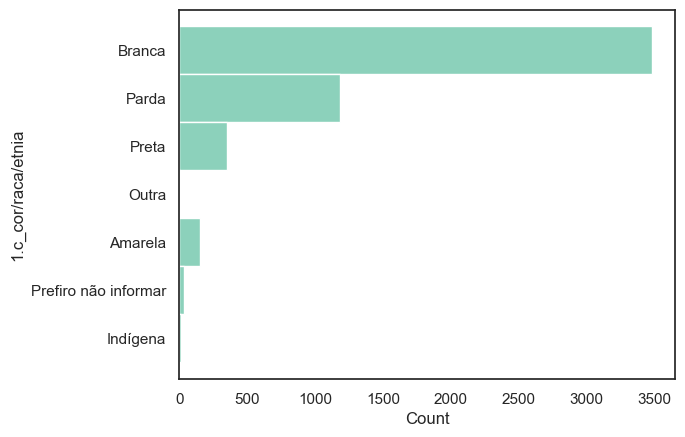

In [18]:
sns.histplot(data=base, y='1.c_cor/raca/etnia')

<Axes: xlabel='Count', ylabel='1.d_pcd'>

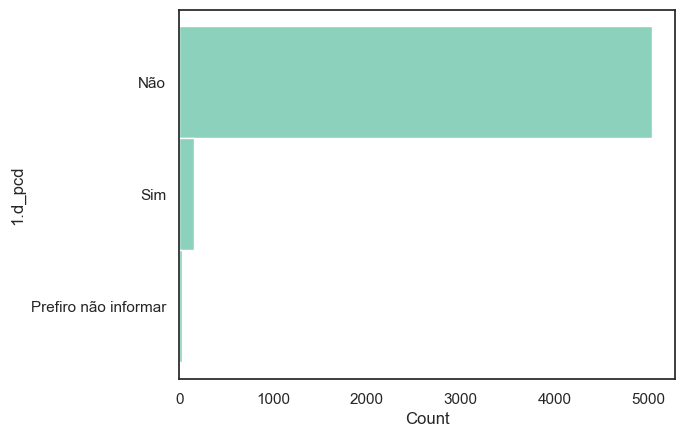

In [19]:
sns.histplot(data=base, y='1.d_pcd')

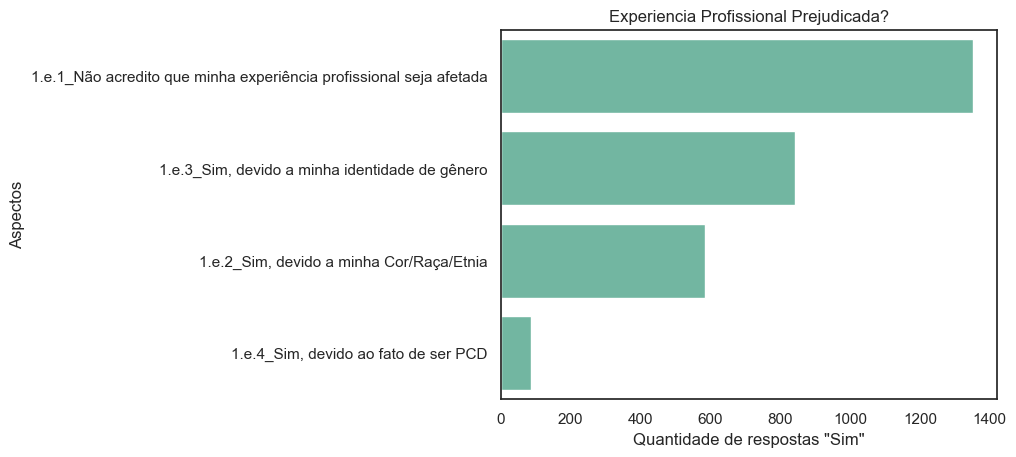

In [20]:
exp_prejudicada = [
    '1.e.1_Não acredito que minha experiência profissional seja afetada',
    '1.e.2_Sim, devido a minha Cor/Raça/Etnia',
    '1.e.3_Sim, devido a minha identidade de gênero',
    '1.e.4_Sim, devido ao fato de ser PCD',
]

contagem_sim = (base[exp_prejudicada] == 'Sim').sum().sort_values(ascending=False)
df_plot = contagem_sim.reset_index()
df_plot.columns = ['Respostas', 'Total_Sim']
sns.barplot(data=df_plot, y='Respostas', x='Total_Sim',)
plt.title('Experiencia Profissional Prejudicada?')
plt.xlabel('Quantidade de respostas "Sim"')
plt.ylabel('Aspectos')
plt.show();

<Axes: xlabel='1.e.2_Sim, devido a minha Cor/Raça/Etnia', ylabel='count'>

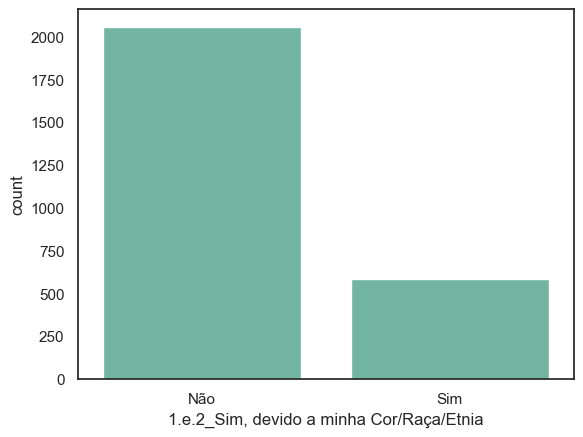

In [21]:
sns.countplot(data=base, x='1.e.2_Sim, devido a minha Cor/Raça/Etnia') 

<Axes: xlabel='1.e.3_Sim, devido a minha identidade de gênero', ylabel='count'>

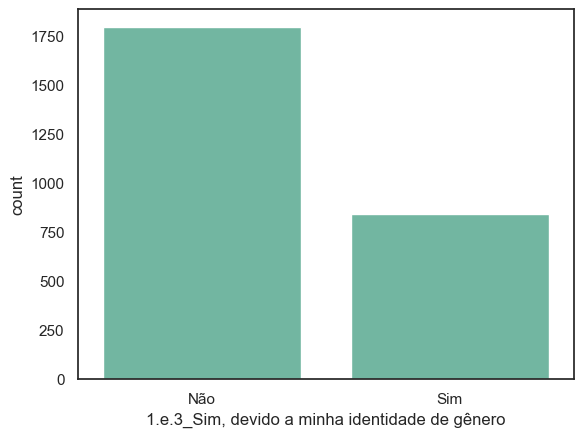

In [22]:
sns.countplot(data=base, x='1.e.3_Sim, devido a minha identidade de gênero') 

<Axes: xlabel='1.e.4_Sim, devido ao fato de ser PCD', ylabel='count'>

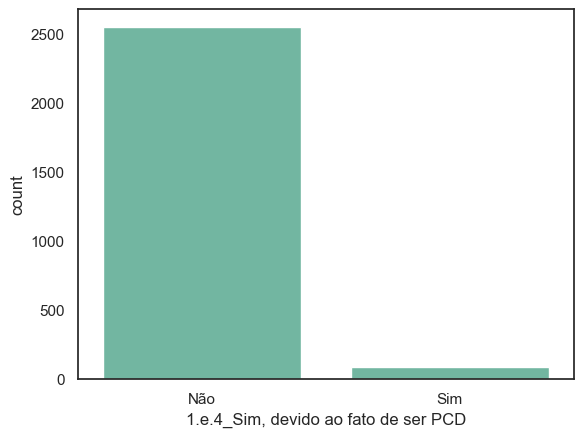

In [23]:
sns.countplot(data=base, x='1.e.4_Sim, devido ao fato de ser PCD') 

#### Aspectos Prejudicados

In [24]:
aspectos_prejudicados = [
    '1.f.1_Quantidade de oportunidades de emprego/vagas recebidas',
 '1.f.2_Senioridade das vagas recebidas em relação à sua experiência',
 '1.f.3_Aprovação em processos seletivos/entrevistas',
 '1.f.4_Oportunidades de progressão de carreira',
 '1.f.5_Velocidade de progressão de carreira',
 '1.f.6_Nível de cobrança no trabalho/Stress no trabalho',
 '1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias',
 '1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho',
 '1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho'
]

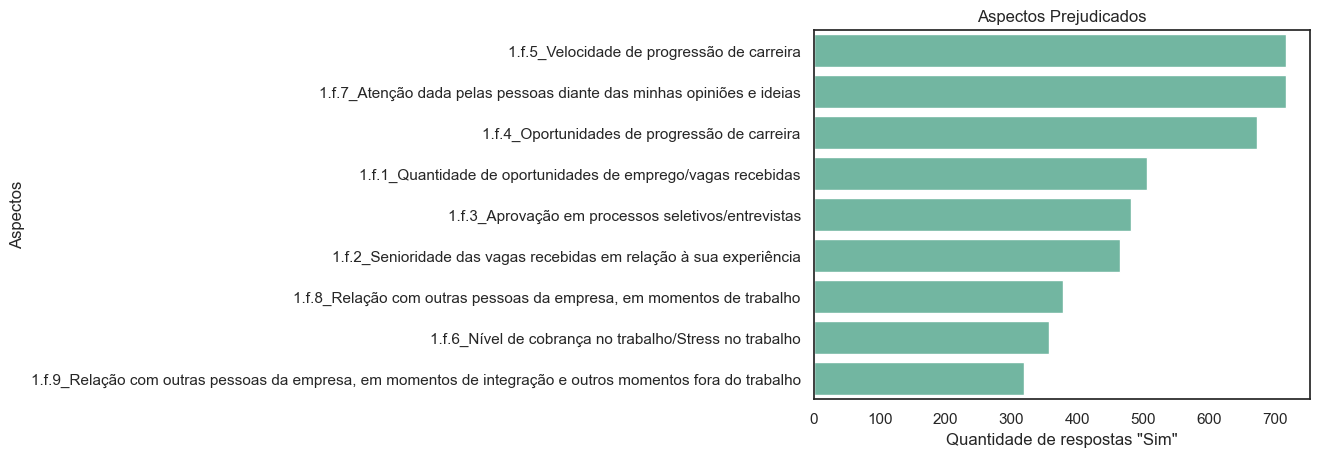

In [25]:
contagem_sim = (base[aspectos_prejudicados] == 'Sim').sum().sort_values(ascending=False)
df_plot = contagem_sim.reset_index()
df_plot.columns = ['Respostas', 'Total_Sim']
sns.barplot(data=df_plot, y='Respostas', x='Total_Sim',)
plt.title('Aspectos Prejudicados')
plt.xlabel('Quantidade de respostas "Sim"')
plt.ylabel('Aspectos')
plt.show();

### Análise Geográfica dos participantes da pesquisa

<Axes: xlabel='1.g_vive_no_brasil', ylabel='count'>

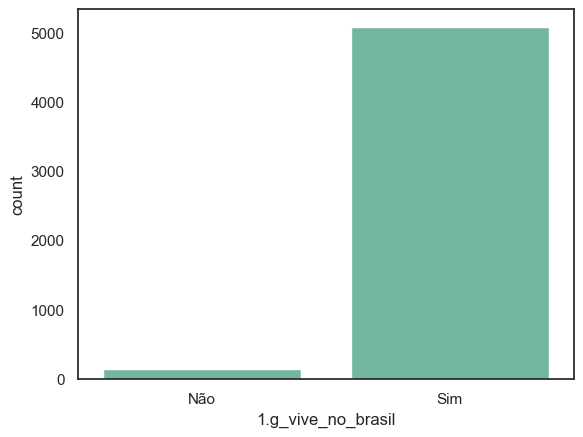

In [26]:
sns.countplot(data=base, x='1.g_vive_no_brasil') 

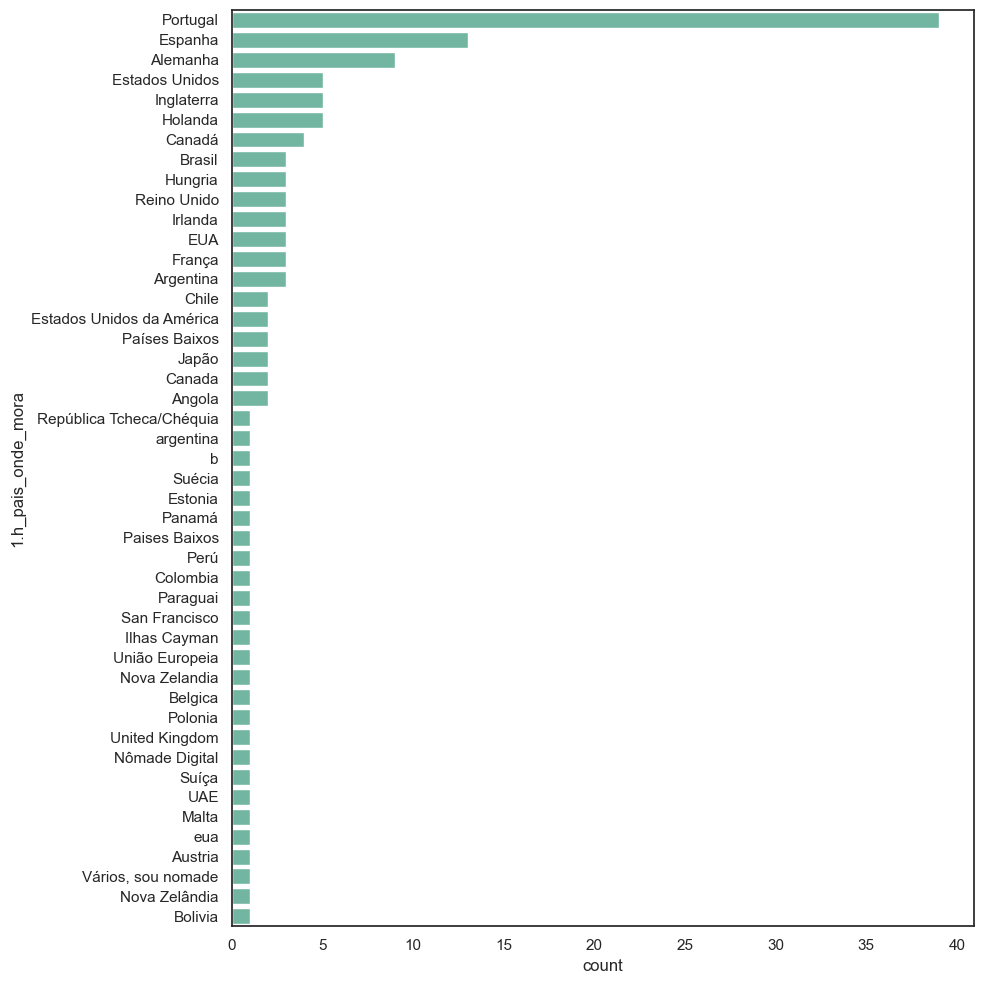

In [27]:
plt.figure(figsize=(10,10))
ordem_pais = base['1.h_pais_onde_mora'].value_counts().index
sns.countplot(data=base, y='1.h_pais_onde_mora', order=ordem_pais)
plt.tight_layout();

<Axes: xlabel='count', ylabel='1.i.2_regiao_onde_mora'>

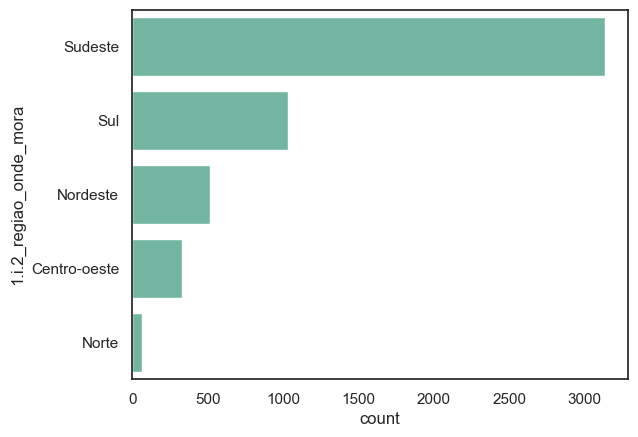

In [28]:
ordem_regiao = base['1.i.2_regiao_onde_mora'].value_counts().index
sns.countplot(data=base, y='1.i.2_regiao_onde_mora', order=ordem_regiao) 

<Axes: xlabel='count', ylabel='1.i_estado_onde_mora'>

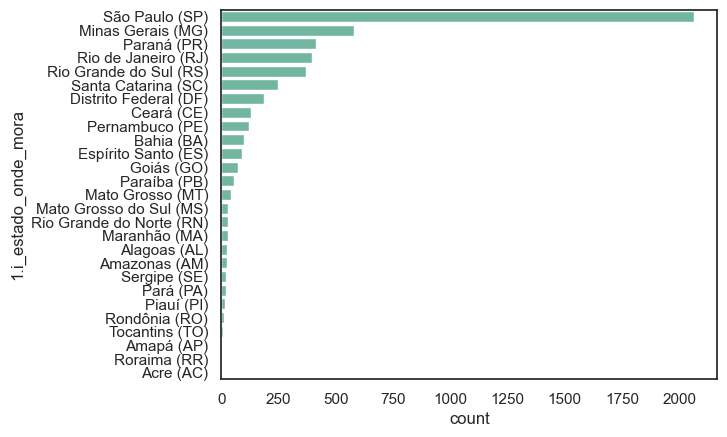

In [29]:
ordem_estado = base['1.i_estado_onde_mora'].value_counts().index
sns.countplot(data=base, y='1.i_estado_onde_mora', order=ordem_estado) 

<Axes: xlabel='count', ylabel='1.i.1_uf_onde_mora'>

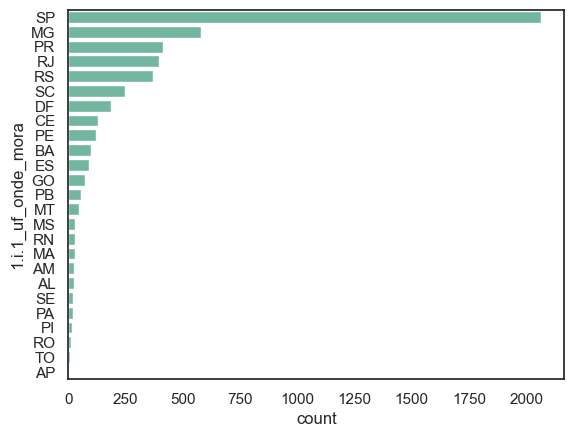

In [30]:
ordem_uf = base['1.i.1_uf_onde_mora'].value_counts().index
sns.countplot(data=base, y='1.i.1_uf_onde_mora', order=ordem_uf) 

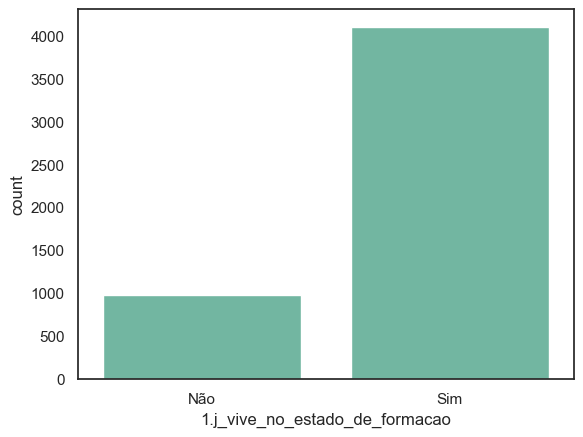

In [31]:
sns.countplot(data=base, x='1.j_vive_no_estado_de_formacao');

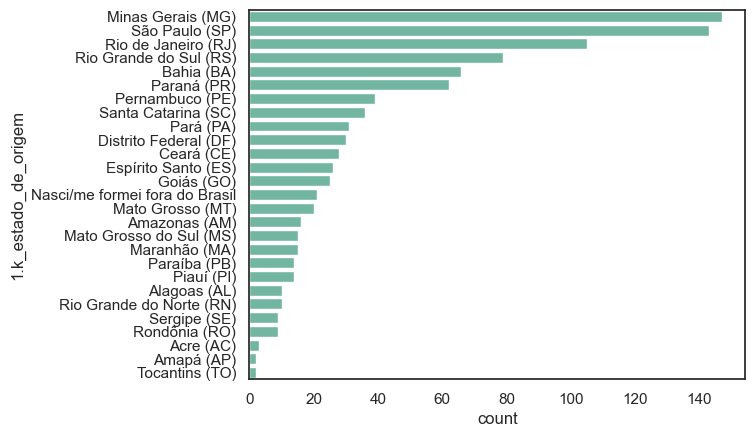

In [32]:
ordem_origem = base['1.k_estado_de_origem'].value_counts().index
sns.countplot(data=base, y='1.k_estado_de_origem', order=ordem_origem);


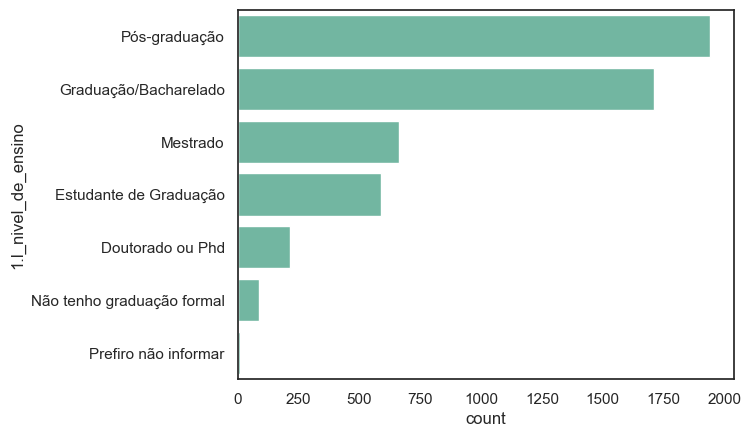

In [33]:
ordem_nivel = base['1.l_nivel_de_ensino'].value_counts().index
sns.countplot(data=base, y='1.l_nivel_de_ensino', order=ordem_nivel);

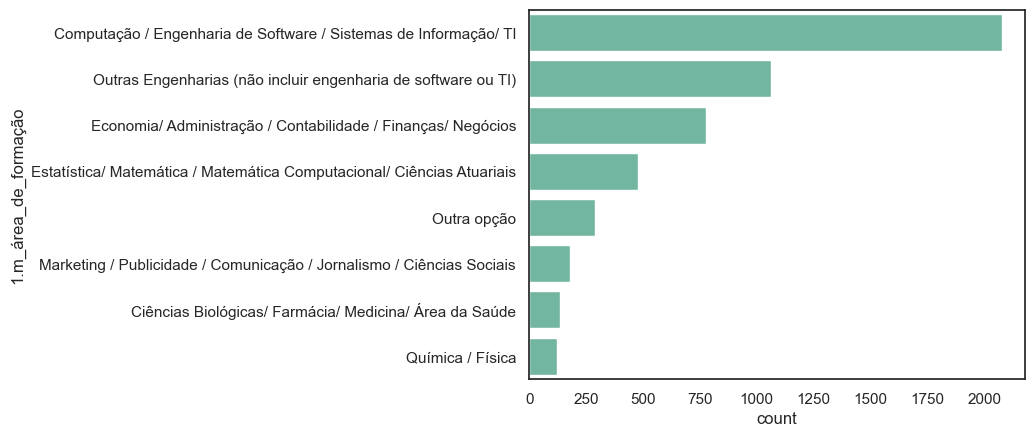

In [34]:
ordem_formacao = base['1.m_área_de_formação'].value_counts().index
sns.countplot(data=base, y='1.m_área_de_formação', order=ordem_formacao);

### - Parte 2 - Dados sobre carreira


In [35]:
colunas_parte2=[]
for coluna in colunas_lista:
    if coluna[0] == '2':
        colunas_parte2.append(coluna)

In [36]:
with pd.option_context("display.max_columns", None):
    display(base[colunas_parte2].head(5))

,2.a_situação_de_trabalho,2.b_setor,2.c_numero_de_funcionarios,2.d_atua_como_gestor,2.e_cargo_como_gestor,2.f_cargo_atual,2.g_nivel,2.h_faixa_salarial,2.i_tempo_de_experiencia_em_dados,2.j_tempo_de_experiencia_em_ti,2.k_satisfeito_atualmente,2.l.1_Remuneração/Salário,2.l.2_Benefícios,2.l.3_Propósito do trabalho e da empresa,2.l.4_Flexibilidade de trabalho remoto,2.l.5_Ambiente e clima de trabalho,2.l.6_Oportunidade de aprendizado e trabalhar com referências,2.l.7_Oportunidades de crescimento,2.l.8_Maturidade da empresa em termos de tecnologia e dados,2.l.9_Relação com os gestores e líderes,2.l.10_Reputação que a empresa tem no mercado,2.l.11_Gostaria de trabalhar em outra área,2.l_motivo_insatisfacao,2.m_participou_de_entrevistas_ultimos_6m,2.n_planos_de_mudar_de_emprego_6m,2.o_criterios_para_escolha_de_emprego,2.o.1_Remuneração/Salário,2.o.2_Benefícios,2.o.3_Propósito do trabalho e da empresa,2.o.4_Flexibilidade de trabalho remoto,2.o.5_Ambiente e clima de trabalho,2.o.6_Oportunidade de aprendizado e trabalhar com referências,2.o.7_Plano de carreira e oportunidades de crescimento,2.o.8_Maturidade da empresa em termos de tecnologia e dados,2.o.9_Qualidade dos gestores e líderes,2.o.10_Reputação que a empresa tem no mercado,2.q_empresa_passou_por_layoff_em_2024,2.r_modelo_de_trabalho_atual,2.s_modelo_de_trabalho_ideal,2.t_atitude_em_caso_de_retorno_presencial
0,Estagiário,Marketing,de 101 a 500,Não,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,de 1 a 2 anos,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Reputação que a empresa t...",Sim,Não,Não,Não,Não,Não,Sim,Não,Não,Sim,"Sim, ocorreram layoffs/demissões em massa na e...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...
1,Estagiário,Finanças ou Bancos,Acima de 3.000,Não,NaN,Analista de BI/BI Analyst,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Menos de 1 ano,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Oportunidade de aprendizado e trabalhar com re...,Não,Não,Não,Não,Não,Sim,Sim,Não,Não,Não,Não ocorreram layoffs/demissões em massa na em...,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial
2,Empregado (CLT),Indústria,de 501 a 1.000,Não,NaN,Outra Opção,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Remuneração/Salário não corresponde a realidad...,Não participei de entrevistas de emprego/proce...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Propósito do trabalho e d...",Sim,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não ocorreram layoffs/demissões em massa na em...,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial
3,Estagiário,Tecnologia/Fábrica de Software,de 501 a 1.000,Não,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Oportunidade de aprendizado e trabalhar com re...,Sim,Não,Não,Não,Não,Sim,Sim,Não,Não,Não,Não ocorreram layoffs/demissões em massa na em...,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial
4,Estagiário,Tecnologia/Fábrica de Software,de 1.001 a 3.000,Não,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,Menos de 1 ano,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, fui ap

In [37]:
base[colunas_parte2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 40 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   2.a_situação_de_trabalho                                       5217 non-null   object  
 1   2.b_setor                                                      4863 non-null   object  
 2   2.c_numero_de_funcionarios                                     4863 non-null   object  
 3   2.d_atua_como_gestor                                           4863 non-null   category
 4   2.e_cargo_como_gestor                                          1045 non-null   object  
 5   2.f_cargo_atual                                                3818 non-null   object  
 6   2.g_nivel                                                      3818 non-null   object  
 7   2.h_faixa_salarial                                 

In [38]:
with pd.option_context("display.max_columns", None):
    display(base[colunas_parte2].describe())

,2.a_situação_de_trabalho,2.b_setor,2.c_numero_de_funcionarios,2.d_atua_como_gestor,2.e_cargo_como_gestor,2.f_cargo_atual,2.g_nivel,2.h_faixa_salarial,2.i_tempo_de_experiencia_em_dados,2.j_tempo_de_experiencia_em_ti,2.k_satisfeito_atualmente,2.l.1_Remuneração/Salário,2.l.2_Benefícios,2.l.3_Propósito do trabalho e da empresa,2.l.4_Flexibilidade de trabalho remoto,2.l.5_Ambiente e clima de trabalho,2.l.6_Oportunidade de aprendizado e trabalhar com referências,2.l.7_Oportunidades de crescimento,2.l.8_Maturidade da empresa em termos de tecnologia e dados,2.l.9_Relação com os gestores e líderes,2.l.10_Reputação que a empresa tem no mercado,2.l.11_Gostaria de trabalhar em outra área,2.l_motivo_insatisfacao,2.m_participou_de_entrevistas_ultimos_6m,2.n_planos_de_mudar_de_emprego_6m,2.o_criterios_para_escolha_de_emprego,2.o.1_Remuneração/Salário,2.o.2_Benefícios,2.o.3_Propósito do trabalho e da empresa,2.o.4_Flexibilidade de trabalho remoto,2.o.5_Ambiente e clima de trabalho,2.o.6_Oportunidade de aprendizado e trabalhar com referências,2.o.7_Plano de carreira e oportunidades de crescimento,2.o.8_Maturidade da empresa em termos de tecnologia e dados,2.o.9_Qualidade dos gestores e líderes,2.o.10_Reputação que a empresa tem no mercado,2.q_empresa_passou_por_layoff_em_2024,2.r_modelo_de_trabalho_atual,2.s_modelo_de_trabalho_ideal,2.t_atitude_em_caso_de_retorno_presencial
count,5217,4863,4863,4863,1045,3818,3818,4863,4863,4863,4863,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,4863,4863,4862,4863,4863,4863,4863,4863,4863,4863,4863,4863,4863,4863,4863,4863,4863
unique,13,21,8,2,5,15,3,13,7,7,2,2,2,2,2,2,2,2,2,2,2,2,439,5,4,504,2,2,2,2,2,2,2,2,2,2,3,4,4,3
top,Empregado (CLT),Finanças ou Bancos,Acima de 3.000,Não,Gerente/Head,Analista de Dados/Data Analyst,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Remuneração/Salário não corresponde a realidad...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Benefícios, Flexibilidade...",Sim,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não ocorreram layoffs/demissões em massa na em...,Modelo 100% remoto,Modelo 100% remoto,Vou procurar outra oportunidade no modelo híbr...
freq,3783,1035,2335,3818,400,957,1573,1080,1386,2634,3336,846,1266,1331,1274,1316,1024,1007,1064,1440,1507,1266,96,2432,1897,461,3941,3627,4064,2804,3833,3684,3320,4233,4487,4587,3470,2222,2238,2150


In [39]:
base['2.h_faixa_salarial'].sort_values().unique()

array(['Acima de R$ 40.001/mês', 'Menos de R$ 1.000/mês',
       'de R$ 1.001/mês a R$ 2.000/mês',
       'de R$ 12.001/mês a R$ 16.000/mês',
       'de R$ 16.001/mês a R$ 20.000/mês',
       'de R$ 2.001/mês a R$ 3.000/mês',
       'de R$ 20.001/mês a R$ 25.000/mês',
       'de R$ 25.001/mês a R$ 30.000/mês',
       'de R$ 3.001/mês a R$ 4.000/mês',
       'de R$ 30.001/mês a R$ 40.000/mês',
       'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês',
       'de R$ 8.001/mês a R$ 12.000/mês', nan], dtype=object)

In [41]:
ordem_salario = [
"Não Informado",
'Menos de R$ 1.000/mês',
'de R$ 1.001/mês a R$ 2.000/mês',
'de R$ 2.001/mês a R$ 3.000/mês',       
'de R$ 3.001/mês a R$ 4.000/mês',
'de R$ 4.001/mês a R$ 6.000/mês', 
'de R$ 6.001/mês a R$ 8.000/mês',
'de R$ 8.001/mês a R$ 12.000/mês',
'de R$ 12.001/mês a R$ 16.000/mês',
'de R$ 16.001/mês a R$ 20.000/mês',
'de R$ 20.001/mês a R$ 25.000/mês',
'de R$ 25.001/mês a R$ 30.000/mês',
'de R$ 30.001/mês a R$ 40.000/mês',       
'Acima de R$ 40.001/mês'
]

In [42]:
ordem_salario

['Não Informado',
 'Menos de R$ 1.000/mês',
 'de R$ 1.001/mês a R$ 2.000/mês',
 'de R$ 2.001/mês a R$ 3.000/mês',
 'de R$ 3.001/mês a R$ 4.000/mês',
 'de R$ 4.001/mês a R$ 6.000/mês',
 'de R$ 6.001/mês a R$ 8.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 12.001/mês a R$ 16.000/mês',
 'de R$ 16.001/mês a R$ 20.000/mês',
 'de R$ 20.001/mês a R$ 25.000/mês',
 'de R$ 25.001/mês a R$ 30.000/mês',
 'de R$ 30.001/mês a R$ 40.000/mês',
 'Acima de R$ 40.001/mês']

In [43]:
base["2.h_faixa_salarial"] = base["2.h_faixa_salarial"].fillna("Não Informado")

In [44]:
base["2.h_faixa_salarial"].value_counts()

2.h_faixa_salarial
de R$ 8.001/mês a R$ 12.000/mês     1080
de R$ 12.001/mês a R$ 16.000/mês     716
de R$ 6.001/mês a R$ 8.000/mês       656
de R$ 4.001/mês a R$ 6.000/mês       593
de R$ 16.001/mês a R$ 20.000/mês     456
Não Informado                        354
de R$ 3.001/mês a R$ 4.000/mês       270
de R$ 20.001/mês a R$ 25.000/mês     246
de R$ 2.001/mês a R$ 3.000/mês       237
de R$ 25.001/mês a R$ 30.000/mês     159
de R$ 30.001/mês a R$ 40.000/mês     158
de R$ 1.001/mês a R$ 2.000/mês       155
Acima de R$ 40.001/mês               104
Menos de R$ 1.000/mês                 33
Name: count, dtype: int64

In [45]:
base["2.h_faixa_salarial"] = pd.Categorical(
    base["2.h_faixa_salarial"], 
    categories=ordem_salario, 
    ordered=True
)

base["2.h_faixa_salarial"].head()

0    de R$ 1.001/mês a R$ 2.000/mês
1             Menos de R$ 1.000/mês
2    de R$ 1.001/mês a R$ 2.000/mês
3    de R$ 1.001/mês a R$ 2.000/mês
4    de R$ 1.001/mês a R$ 2.000/mês
Name: 2.h_faixa_salarial, dtype: category
Categories (14, object): ['Não Informado' < 'Menos de R$ 1.000/mês' < 'de R$ 1.001/mês a R$ 2.000/mês' < 'de R$ 2.001/mês a R$ 3.000/mês' ... 'de R$ 20.001/mês a R$ 25.000/mês' < 'de R$ 25.001/mês a R$ 30.000/mês' < 'de R$ 30.001/mês a R$ 40.000/mês' < 'Acima de R$ 40.001/mês']

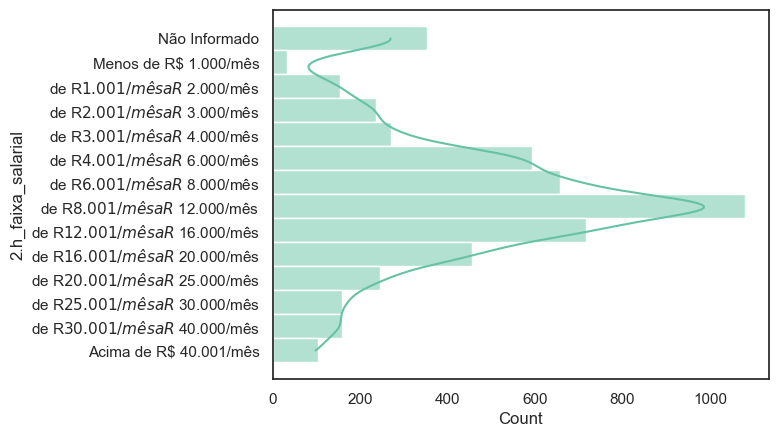

In [46]:
#ordem_salario = base['2.h_faixa_salarial'].value_counts().index
sns.histplot(data=base, y='2.h_faixa_salarial', kde=True );

In [48]:
pd.crosstab(index=base['2.a_situação_de_trabalho'], columns=base['2.h_faixa_salarial'], values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

2.h_faixa_salarial,Não Informado,Menos de R$ 1.000/mês,de R$ 1.001/mês a R$ 2.000/mês,de R$ 2.001/mês a R$ 3.000/mês,de R$ 3.001/mês a R$ 4.000/mês,de R$ 4.001/mês a R$ 6.000/mês,de R$ 6.001/mês a R$ 8.000/mês,de R$ 8.001/mês a R$ 12.000/mês,de R$ 12.001/mês a R$ 16.000/mês,de R$ 16.001/mês a R$ 20.000/mês,de R$ 20.001/mês a R$ 25.000/mês,de R$ 25.001/mês a R$ 30.000/mês,de R$ 30.001/mês a R$ 40.000/mês,Acima de R$ 40.001/mês
2.a_situação_de_trabalho,,,,,,,,,,,,,,
Desempregado e não estou buscando recolocação,0,0,0,0,1,1,0,2,4,2,0,0,1,0
"Desempregado, buscando recolocação",205,0,0,0,0,0,0,0,0,0,0,0,0,0
Empreendedor ou Empregado (CNPJ),0,2,7,15,34,62,59,89,73,56,35,26,18,18
Empregado (CLT),0,2,43,155,211,506,567,942,599,354,168,100,85,51
Estagiário,0,21,96,52,12,1,2,0,1,0,0,0,0,1
Freelancer,0,4,4,4,9,3,5,2,3,3,1,0,2,1
Prefiro não informar,0,2,3,1,0,1,2,4,1,2,0,0,0,0
Servidor Público,0,1,2,9,2,13,13,26,18,14,9,7,8,2
Somente Estudante (graduação),68,0,0,0,0,0,0,0,0,0,0,0,0,0


Coluna de salário "Não informado" se refere a pessoas que não trabalham na área ainda. 
Como o objetivo é analisar o salário dos profissionais, iremos deletar as respostas sem a informação de faixa salarial.

In [56]:
base = base[base["2.h_faixa_salarial"] != "Não informado"]

In [57]:
base["2.h_faixa_salarial"] = base["2.h_faixa_salarial"].cat.remove_unused_categories()

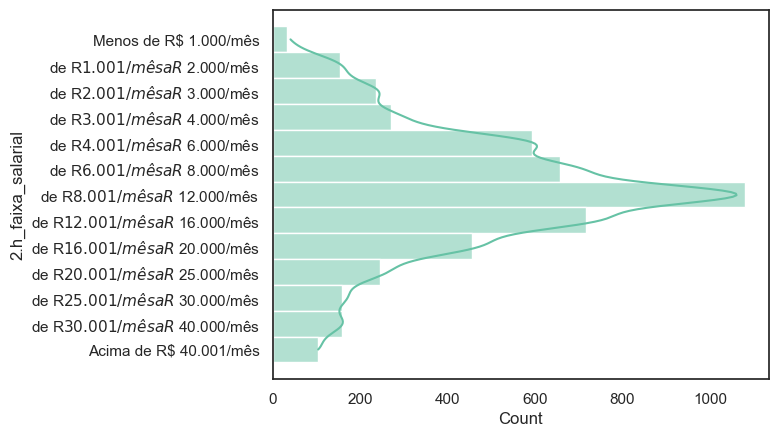

In [58]:
sns.histplot(data=base, y='2.h_faixa_salarial', kde=True );